In [1]:
import os
import time
import random
import numpy as np
import pandas as pd
import torch
from networks.HAND.TransBTS_downsample8x_skipconnection import TransBTS
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

/home/zhemin/anaconda3/envs/vqvae_env/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/zhemin/anaconda3/envs/vqvae_env/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
device = torch.device(f"cuda:{0}" if torch.cuda.is_available() else "cpu")
print("DEVICE INFO:", device)
_, model_bts = TransBTS(dataset='breast', _conv_repr=True, _pe_type="learned")
checkpoint = torch.load('./checkpoint/TransBTS2024-04-10/model_epoch_last.pth')
model_bts.load_state_dict(checkpoint['state_dict'])
# model_bts = load_ckpt('./checkpoint/TransBTS2024-04-10/model_epoch_last.pth', model_bts)
# model_bts.to(device)
model_bts.eval()

DEVICE INFO: cuda:0


BTS(
  (linear_encoding): Linear(in_features=128, out_features=128, bias=True)
  (position_encoding): LearnedPositionalEncoding()
  (pe_dropout): Dropout(p=0.1, inplace=False)
  (transformer): TransformerModel(
    (net): IntermediateSequential(
      (0): Residual(
        (fn): PreNormDrop(
          (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (fn): SelfAttention(
            (qkv): Linear(in_features=128, out_features=384, bias=False)
            (attn_drop): Dropout(p=0.1, inplace=False)
            (proj): Linear(in_features=128, out_features=128, bias=True)
            (proj_drop): Dropout(p=0.1, inplace=False)
          )
        )
      )
      (1): Residual(
        (fn): PreNorm(
          (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (fn): FeedForward(
            (net): Sequential(
              (0): Linear(in_features=128, out_features=1024, bias=True)
              (1)

In [3]:
def img_process(path):
    img_in = Image.open(path)
    img_in = img_in.convert('L')
    img_in = np.array(img_in)
    img_norm = (((img_in-np.min(img_in))/(np.max(img_in)-np.min(img_in)))*255).astype(dtype='uint8')

    # img_norm = np.expand_dims(img_norm, axis=-1)
    transformations = transforms.Compose([transforms.ToTensor(), 
                                          transforms.Resize((256,256)),
                                        transforms.Normalize(mean=[0.5], std=[0.5])])
    resize_img = transformations(img_norm)
    resize_img = resize_img.to(torch.float32)
    resize_img = (resize_img+1)/2

    return resize_img

# RSNA

## normal

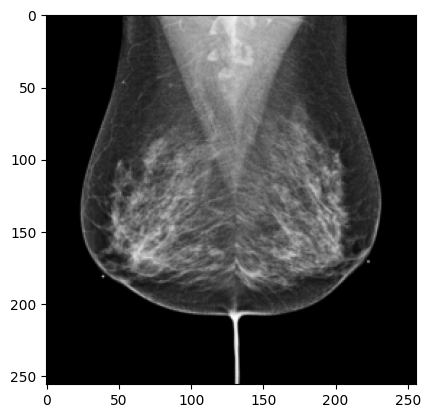

In [4]:
img_none = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/0_id.png')
img_none = np.array(img_none)
plt.imshow(img_none, cmap='gray')

torch.Size([1, 256, 256])


(-0.5, 255.5, 255.5, -0.5)

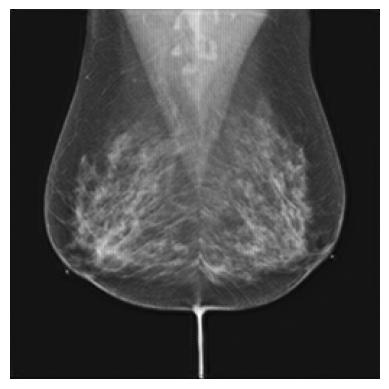

In [6]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/0_id.png')
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')
plt.axis("off")

## implant

(-0.5, 255.5, 255.5, -0.5)

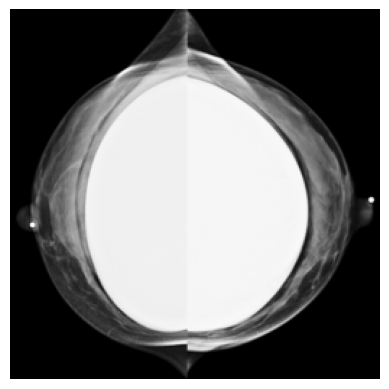

In [7]:
img = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/1_implant.png')
img = np.array(img)
plt.imshow(img, cmap='gray')
plt.axis("off")

torch.Size([1, 256, 256])


(-0.5, 255.5, 255.5, -0.5)

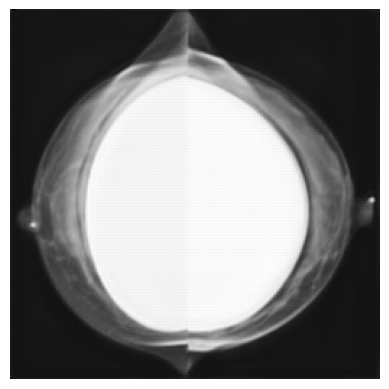

In [8]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/1_implant.png')
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')
plt.axis("off")

## salt and pepper

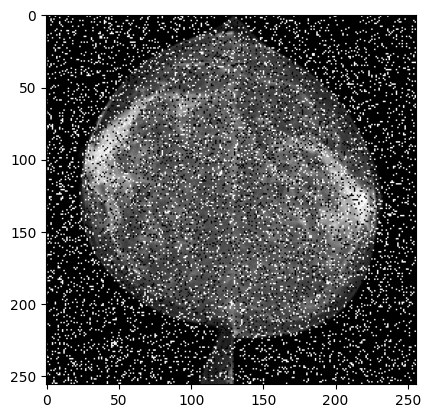

In [9]:
img = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/2_sp.png')
img = np.array(img)
plt.imshow(img, cmap='gray')

torch.Size([1, 256, 256])


(-0.5, 255.5, 255.5, -0.5)

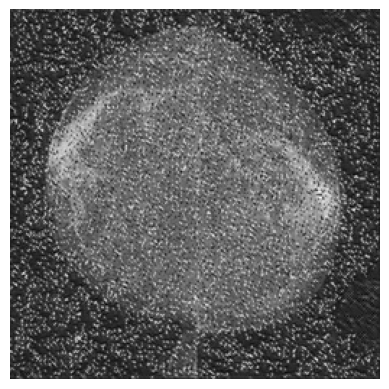

In [10]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/2_sp.png')
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')
plt.axis("off")

## distortion

(-0.5, 255.5, 255.5, -0.5)

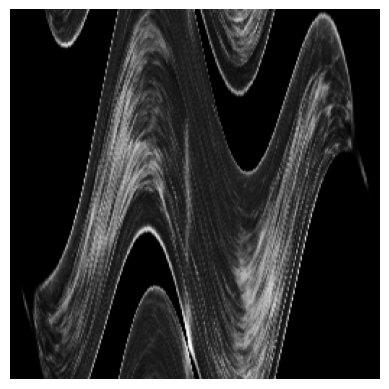

In [11]:
img = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/3_distort.png')
img = np.array(img)
plt.imshow(img, cmap='gray')
plt.axis("off")

torch.Size([1, 256, 256])


(-0.5, 255.5, 255.5, -0.5)

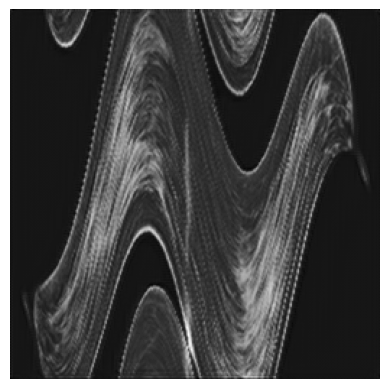

In [12]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/3_distort.png')
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')
plt.axis("off")

## gaussian

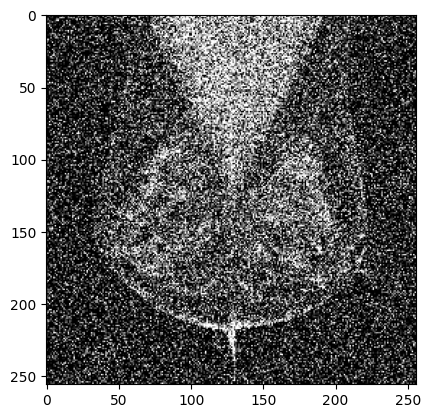

In [13]:
img = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/4_gaussian.png')
img = np.array(img)
plt.imshow(img, cmap='gray')

torch.Size([1, 256, 256])


(-0.5, 255.5, 255.5, -0.5)

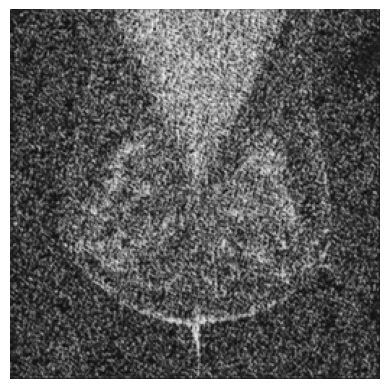

In [14]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/4_gaussian.png')
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')
plt.axis("off")

## bad quality

(-0.5, 255.5, 255.5, -0.5)

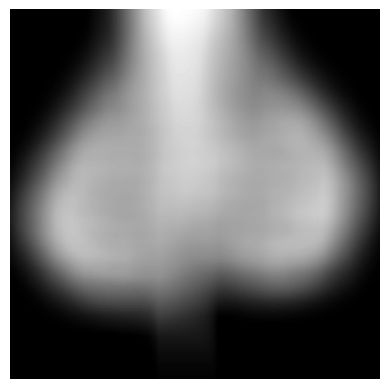

In [15]:
img = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/5_poorRes.png')
img = np.array(img)
plt.imshow(img, cmap='gray')
plt.axis("off")

torch.Size([1, 256, 256])


(-0.5, 255.5, 255.5, -0.5)

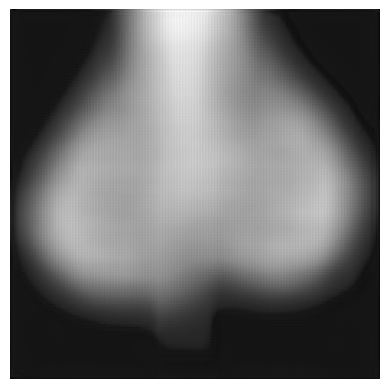

In [16]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/5_poorRes.png')
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')
plt.axis("off")

## natural

(-0.5, 499.5, 330.5, -0.5)

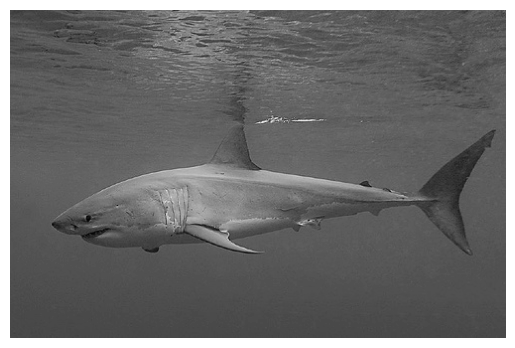

In [17]:
img = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/6_natural.png')
img = np.array(img)
plt.imshow(img, cmap='gray')
plt.axis("off")

torch.Size([1, 256, 256])
torch.Size([1, 256, 256])


/home/zhemin/anaconda3/envs/vqvae_env/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


(-0.5, 255.5, 255.5, -0.5)

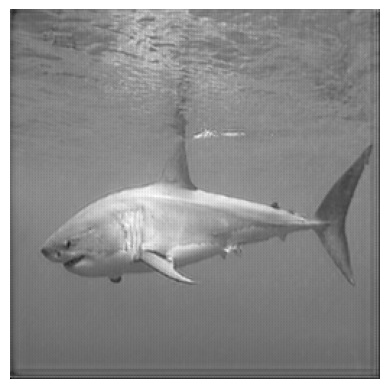

In [18]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/6_natural.png')
print(img_none.shape)
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')
plt.axis("off")

# Mayo

(-0.5, 2225.5, 2225.5, -0.5)

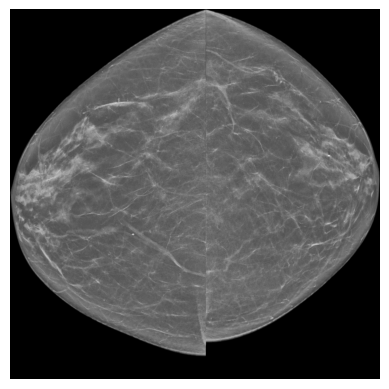

In [19]:
path = '/home/zhemin/Datacenter_storage/zhemin/test_generation/external/mayo_recon/3_qi.png'
img = Image.open(path)
img = np.array(img)
plt.imshow(img, cmap='gray')
plt.axis("off")

torch.Size([1, 256, 256])
torch.Size([1, 256, 256])


(-0.5, 255.5, 255.5, -0.5)

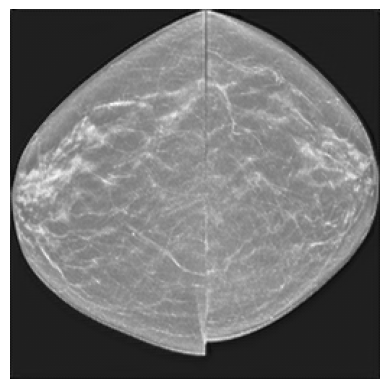

In [20]:
img = img_process(path)
print(img.shape)
recon_x = model_bts(img.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')
plt.axis("off")

(-0.5, 4071.5, 4071.5, -0.5)

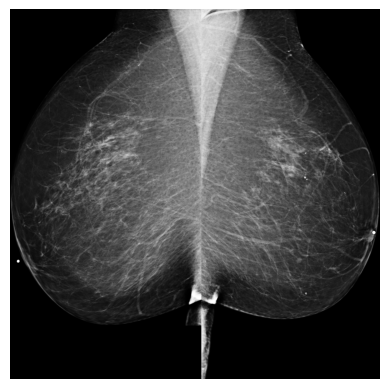

In [22]:
path = '/home/zhemin/Datacenter_storage/zhemin/test_generation/external/mayo_recon/0_null.png'
img = Image.open(path)
img = np.array(img)
plt.imshow(img, cmap='gray')
plt.axis("off")

torch.Size([1, 256, 256])
torch.Size([1, 256, 256])


(-0.5, 255.5, 255.5, -0.5)

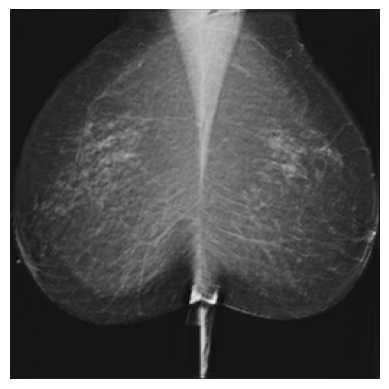

In [23]:
img = img_process(path)
print(img.shape)
recon_x = model_bts(img.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')
plt.axis("off")

(-0.5, 388.5, 388.5, -0.5)

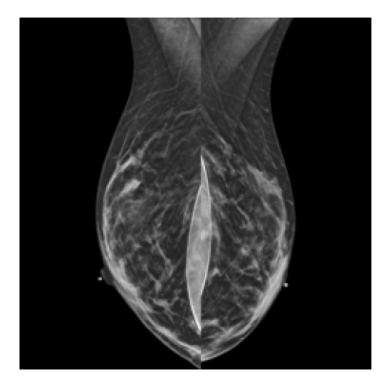

In [24]:
path = '/home/zhemin/Datacenter_storage/zhemin/test_generation/external/mayo_recon/1_implant.png'
img = Image.open(path)
img = np.array(img)
plt.imshow(img, cmap='gray')
plt.axis("off")

torch.Size([1, 256, 256])
torch.Size([1, 256, 256])


(-0.5, 255.5, 255.5, -0.5)

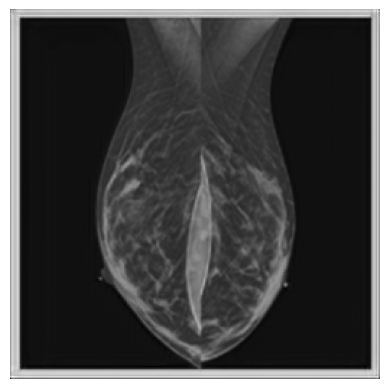

In [25]:
img = img_process(path)
print(img.shape)
recon_x = model_bts(img.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')
plt.axis("off")

(-0.5, 2985.5, 2985.5, -0.5)

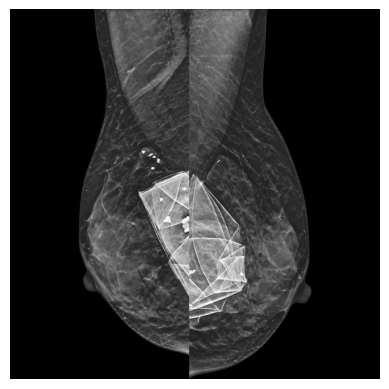

In [27]:
path = '/home/zhemin/Datacenter_storage/zhemin/test_generation/external/mayo_recon/1_implant_rap.png'
img = Image.open(path)
img = np.array(img)
plt.imshow(img, cmap='gray')
plt.axis("off")

torch.Size([1, 256, 256])
torch.Size([1, 256, 256])


(-0.5, 255.5, 255.5, -0.5)

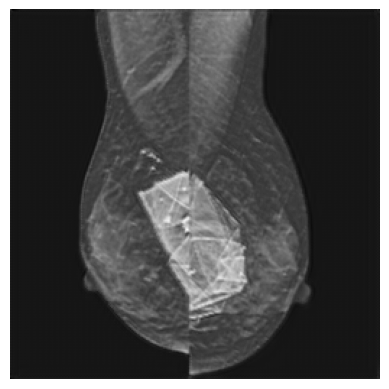

In [28]:
img = img_process(path)
print(img.shape)
recon_x = model_bts(img.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')
plt.axis("off")

(-0.5, 4071.5, 4071.5, -0.5)

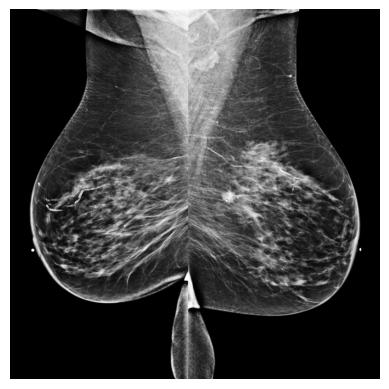

In [29]:
path = '/home/zhemin/Datacenter_storage/zhemin/test_generation/external/mayo_recon/2_bc.png'
img = Image.open(path)
img = np.array(img)
plt.imshow(img, cmap='gray')
plt.axis("off")

torch.Size([1, 256, 256])
torch.Size([1, 256, 256])


(-0.5, 255.5, 255.5, -0.5)

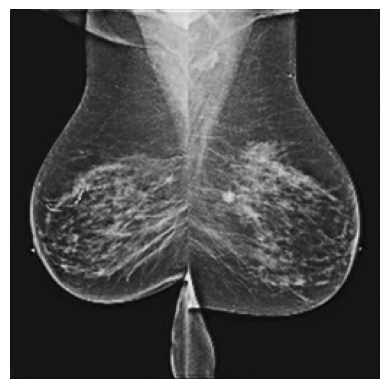

In [30]:
img = img_process(path)
print(img.shape)
recon_x = model_bts(img.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')
plt.axis("off")